In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models

2023-12-10 10:12:51.830537: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-10 10:12:52.041729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 10:12:52.041787: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 10:12:52.042552: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 10:12:52.124648: I tensorflow/core/platform/cpu_feature_g

In [5]:
pd.set_option('display.max_columns', 50)

# Building the Model

## Loading Dataframes

In [2]:
train_set = pd.read_pickle("./normalized_train_data.pkl")
train_set.size

281953

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   current_age                    5999 non-null   float64
 1   retirement_age                 5999 non-null   float64
 2   birth_year                     5999 non-null   float64
 3   birth_month                    5999 non-null   float64
 4   per_capita_income_zipcode      5999 non-null   float64
 5   yearly_income_person           5999 non-null   float64
 6   total_debt                     5999 non-null   float64
 7   fico_score                     5999 non-null   float64
 8   num_credit_cards               5999 non-null   float64
 9   expires_month                  5999 non-null   float64
 10  expires_year                   5999 non-null   float64
 11  has_chip                       5999 non-null   int64  
 12  cards_issued                   5999 non-null   f

In [6]:
print(train_set.shape)
train_set.describe()

(5999, 47)


,current_age,retirement_age,birth_year,birth_month,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,expires_month,expires_year,has_chip,cards_issued,credit_limit,acct_open_month,acct_open_year,year_pin_last_changed,card_on_dark_web,card,year,month,day,amount,hour,minute,is_fraud,insufficient_balance,bad_pin,technical_glitch,bad_card_number,bad_cvv,bad_expiration,bad_zipcode,swipe_transaction,chip_transaction,online_transaction,gender_target_encoded,city_target_encoded,state_target_encoded,zipcode_target_encoded,card_brand_target_encoded,card_type_target_encoded,cvv_target_encoded,merchant_city_target_encoded,merchant_state_target_encoded,mcc_target_encoded,purchase_zip_target_encoded
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,0.0,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,0.399607,0.570089,0.602763,0.502553,0.143940,0.163248,0.120066,0.621171,0.359185,0.501220,0.726010,0.909485,0.267211,0.105733,0.504993,0.684913,0.513836,0.0,0.181426,NaN,0.585598,0.505329,0.170612,0.532719,0.503369,0.500083,0.011335,0.002167,0.002334,0.003334,0.005834,0.003167,0.0,0.116353,0.399900,0.483747,0.500083,0.500083,0.500083,0.500083,0.500083,0.500083,0.500083,0.500083,0.500083,0.500083,0.500083
std,0.202126,0.121660,0.202084,0.325226,0.071750,0.086443,0.110478,0.182224,0.201945,0.306215,0.227679,0.286942,0.259902,0.084929,0.311278,0.168575,0.152096,0.0,0.184023,NaN,0.295098,0.297058,0.050939,0.174956,0.294576,0.500042,0.105871,0.046505,0.048256,0.057648,0.076166,0.056193,0.0,0.320674,0.489918,0.499777,0.013921,0.359170,0.106962,0.394316,0.034965,0.045445,0.359923,0.422606,0.363850,0.352733,0.434010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.486245,0.000000,0.000000,0.000000,0.483930,0.467805,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243590,0.517241,0.474359,0.181818,0.103154,0.113388,0.031486,0.541436,0.250000,0.272727,0.555556,1.000000,0.000000,0.049517,0.272727,0.583333,0.444444,0.0,0.000000,NaN,0.363636,0.233333,0.149762,0.434783,0.254237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.486245,0.000000,0.452830,0.000000,0.483930,0.467805,0.000000,0.000000,0.142857,0.130982,0.000000
50%,0.371795,0.551724,0.628205,0.545455,0.128211,0.144459,0.102182,0.624309,0.375000,0.545455,0.777778,1.000000,0.500000,0.092679,0.454545,0.708333,0.500000,0.0,0.125000,NaN,0.636364,0.500000,0.160662,0.521739,0.508475,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.486245,0.600000,0.530303,0.666667,0.494750,0.467805,0.611111,0.872245,0.324324,0.694581,0.866279
75%,0.525641,0.655172,0.756410,0.818182,0.162843,0.190422,0.174934,0.743094,0.500000,0.727273,0.888889,1.000000,0.500000,0.147375,0.818182,0.791667,0.611111,0.0,0.250000,NaN,0.818182,0.766667,0.178496,0.652174,0.762712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.514085,0.818182,0.561969,0.857143,0.494750,0.527970,0.809524,0.872245,0.872245,0.782609,0.866279
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [7]:
validation_set = pd.read_pickle("./normalized_validation_data.pkl")
validation_set.shape

(5097, 47)

In [8]:
validation_set.describe()

,current_age,retirement_age,birth_year,birth_month,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,expires_month,expires_year,has_chip,cards_issued,credit_limit,acct_open_month,acct_open_year,year_pin_last_changed,card_on_dark_web,card,year,month,day,amount,hour,minute,is_fraud,insufficient_balance,bad_pin,technical_glitch,bad_card_number,bad_cvv,bad_expiration,bad_zipcode,swipe_transaction,chip_transaction,online_transaction,gender_target_encoded,city_target_encoded,state_target_encoded,zipcode_target_encoded,card_brand_target_encoded,card_type_target_encoded,cvv_target_encoded,merchant_city_target_encoded,merchant_state_target_encoded,mcc_target_encoded,purchase_zip_target_encoded
count,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.0,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.0,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000
mean,0.407287,0.563401,0.587916,0.496513,0.172392,0.165646,0.128442,0.624852,0.320409,0.494248,0.714587,0.897194,0.262017,0.105424,0.494801,0.600698,0.524149,0.0,0.162522,0.410683,0.472435,0.486358,0.298700,0.539780,0.503793,0.019423,0.009221,0.002354,0.002354,0.000589,0.000785,0.000785,0.0,0.168334,0.702570,0.129096,0.019423,0.019423,0.019423,0.019423,0.019423,0.019423,0.019423,0.019423,0.019423,0.019423,0.019423
std,0.198664,0.122938,0.196374,0.321671,0.077785,0.079585,0.109635,0.183612,0.200460,0.312784,0.208211,0.303735,0.257092,0.080785,0.315298,0.161584,0.187466,0.0,0.169631,0.307394,0.321214,0.296526,0.043915,0.221187,0.297451,0.138021,0.095592,0.048469,0.048469,0.024256,0.028006,0.028006,0.0,0.374200,0.457172,0.335339,0.006016,0.065793,0.013316,0.075863,0.004763,0.000847,0.067858,0.103430,0.100427,0.065949,0.055209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.013136,0.000000,0.000000,0.000000,0.007299,0.018764,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253012,0.517241,0.476190,0.181818,0.124210,0.118766,0.042866,0.545946,0.125000,0.181818,0.500000,1.000000,0.000000,0.052960,0.181818,0.482759,0.411765,0.0,0.000000,0.250000,0.181818,0.233333,0.278834,0.391304,0.237288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.013136,0.000000,0.010526,0.000000,0.016053,0.018764,0.000000,0.000000,0.000000,0.001927,0.000000
50%,0.385542,0.551724,0.607143,0.545455,0.153964,0.147995,0.116262,0.627027,0.250000,0.454545,0.750000,1.000000,0.500000,0.093132,0.454545,0.586207,0.470588,0.0,0.125000,0.500000,0.454545,0.500000,0.290219,0.521739,0.508475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.025179,0.000000,0.018321,0.000000,0.016053,0.018764,0.000000,0.000000,0.000000,0.005076,0.000000
75%,0.530120,0.620690,0.738095,0.818182,0.198708,0.192325,0.183900,0.743243,0.500000,0.727273,0.875000,1.000000,0.500000,0.142159,0.818182,0.689655,0.647059,0.0,0.250000,0.750000,0.727273,0.733333,0.308966,0.695652,0.762712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.025179,0.000000,0.027088,0.000000,0.023462,0.020270,0.000000,0.000000,0.003906,0.016807,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1

## Shuffling dataset

In [9]:
train_set = train_set.sample(frac=1)

## Removing Year from data (due to bias)

In [10]:
train_set = train_set.drop('year', axis=1)

In [11]:
validation_set = validation_set.drop('year', axis=1)

## Separating into Data and Labels

### Training

In [12]:
train_data = train_set.drop(columns="is_fraud").values.astype('float32')
train_labels = train_set['is_fraud'].values.astype('float32')

In [13]:
print(train_data)

[[0.14102565 0.5862069  0.85897434 ... 0.8722452  0.9122807  0.86627907]
 [0.65384614 0.5862069  0.34615386 ... 0.8722452  0.7176471  0.86627907]
 [0.65384614 0.55172414 0.34615386 ... 0.8722452  0.7282609  0.86627907]
 ...
 [0.7692308  0.44827586 0.23076923 ... 0.17886178 0.371134   0.        ]
 [0.53846157 0.4827586  0.46153846 ... 0.8722452  0.9849624  0.86627907]
 [0.25641027 0.55172414 0.74358976 ... 0.         0.10116731 0.        ]]


In [14]:
print(train_labels)

[0. 1. 1. ... 0. 1. 0.]


### Validation

In [15]:
validation_data = validation_set.drop(columns="is_fraud").values.astype('float32')
validation_labels = validation_set['is_fraud'].values.astype('float32')

In [16]:
print(validation_data)

[[0.42168674 0.55172414 0.5714286  ... 0.         0.00192678 0.        ]
 [0.42168674 0.55172414 0.5714286  ... 0.00371058 0.00617284 0.        ]
 [0.7590361  0.5862069  0.23809524 ... 0.00371058 0.05741627 0.        ]
 ...
 [0.03614458 0.3448276  0.95238096 ... 0.         0.00257732 0.        ]
 [0.03614458 0.3448276  0.95238096 ... 0.05748865 0.02912621 0.12313937]
 [0.03614458 0.3448276  0.95238096 ... 0.05748865 0.02912621 0.12313937]]


In [17]:
print(validation_labels)

[0. 0. 0. ... 0. 0. 0.]


## Defining and Compiling the Model

In [66]:
def displayColumnNames(df):
    temp = 0
    for c in df.columns:
        print(f"{temp} {c}")
        temp += 1

In [18]:
train_data.shape

(5999, 45)

In [19]:
train_labels.shape

(5999,)

In [21]:
model = models.Sequential()
model.add(layers.Dense(128,  activation='relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training Model

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
BATCH_SIZE = 5

history = model.fit(train_data, train_labels, validation_data=(validation_data,validation_labels), epochs=20, batch_size=BATCH_SIZE, callbacks=callback)

Epoch 1/20


2023-12-10 10:22:08.908993: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7b690cb220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-10 10:22:08.909042: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2023-12-10 10:22:08.918860: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-10 10:22:08.946952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-10 10:22:09.092253: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1200/1200 [==============================] - 15s 9ms/step - loss: 0.0825 - accuracy: 0.9702 - val_loss: 0.0637 - val_accuracy: 0.9837
Epoch 2/20
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0525 - accuracy: 0.9822 - val_loss: 0.1062 - val_accuracy: 0.9837
Epoch 3/20
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0452 - accuracy: 0.9868 - val_loss: 0.0732 - val_accuracy: 0.9857
Epoch 4/20
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0448 - accuracy: 0.9840 - val_loss: 0.0866 - val_accuracy: 0.9839
Epoch 5/20
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0551 - val_accuracy: 0.9847
Epoch 6/20
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0842 - val_accuracy: 0.9837
Epoch 7/20
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0938 - val_accuracy: 0.9

## Evaluating Model

In [72]:
# From model trained without specifying input size
accuracy = model.evaluate(validation_data, validation_labels)

print('Loss: %.2f' % (accuracy[0]*100))
print('Accuracy: %.2f' % (accuracy[1]*100))

160/160 [==============================] - 1s 5ms/step - loss: 0.2121 - accuracy: 0.9829
Loss: 21.21
Accuracy: 98.29


In [23]:
# New model with input size specified (and a different training set)
accuracy = model.evaluate(validation_data, validation_labels)

print('Loss: %.2f' % (accuracy[0]*100))
print('Accuracy: %.2f' % (accuracy[1]*100))

160/160 [==============================] - 1s 3ms/step - loss: 0.1976 - accuracy: 0.9839
Loss: 19.76
Accuracy: 98.39


### Testing Model

#### Old model - trained without specifying input size

In [74]:
predictions = model.predict(validation_data)
print(predictions)

[[3.2709861e-14]
 [1.8565099e-11]
 [4.8907670e-11]
 ...
 [1.4086586e-19]
 [2.8565470e-12]
 [5.1152711e-12]]


In [75]:
table = [[0,0],[0,0]]

for i in range(predictions.size):
    if predictions[i] < 0.5:
        if validation_labels[i] == 0:
            table[0][0] += 1
        else:
            table[0][1] += 1
    else:
        if validation_labels[i] == 0:
            table[1][0] += 1
        else:
            table[1][1] += 1
    
print(table)

[[4998, 87], [0, 12]]


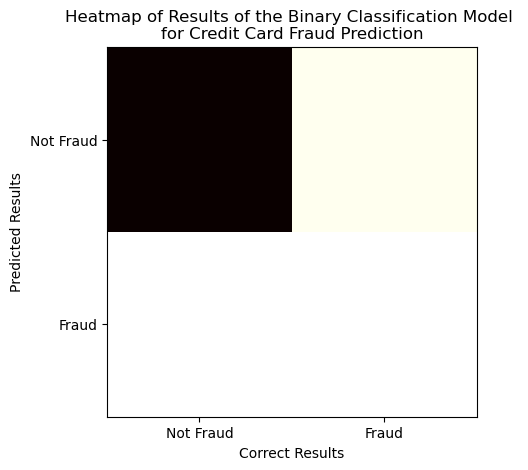

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(table, cmap='hot_r', interpolation='nearest')
plt.xticks([0,1], ["Not Fraud", "Fraud"])
plt.yticks([0,1], ["Not Fraud", "Fraud"])
plt.title("Heatmap of Results of the Binary Classification Model \nfor Credit Card Fraud Prediction")
plt.xlabel("Correct Results")
plt.ylabel("Predicted Results")
plt.show()

In [77]:
barTable = {
    "True Negative":table[0][0],
    "False Negative":table[0][1],
    "False Positive":table[1][0],
    "True Positive":table[1][1]
}

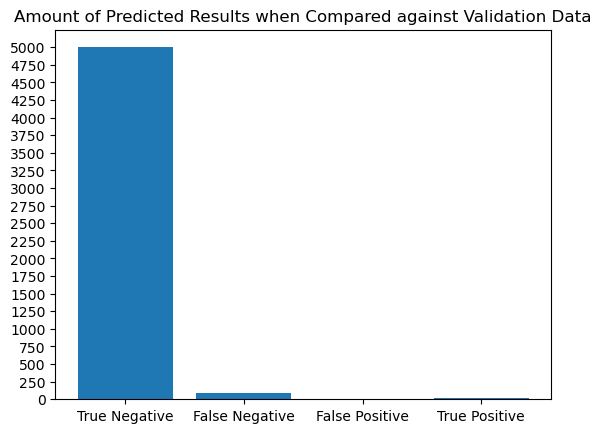

In [78]:
Y_STEP = 250

plt.bar(range(len(barTable)), list(barTable.values()), align='center')
plt.xticks(range(len(barTable)), list(barTable.keys()))
plt.yticks(np.arange(0, max(barTable.values()) + Y_STEP, Y_STEP))
plt.title("Amount of Predicted Results when Compared against Validation Data")
plt.show()

#### New model - trained with input size specified

In [26]:
predictions = model.predict(validation_data)

160/160 [==============================] - 1s 3ms/step


In [27]:
def get_confusion_table(predictions, y_test):
    table = [[0,0],[0,0]]
    for i in range(predictions.size):
        if predictions[i] < 0.5:
            if y_test[i] == 0:
                table[0][0] += 1
            else:
                table[0][1] += 1
        else:
            if y_test[i] == 0:
                table[1][0] += 1
            else:
                table[1][1] += 1
    return table

In [28]:
confusion_table = get_confusion_table(predictions=predictions, y_test=validation_labels)
confusion_table

[[4997, 81], [1, 18]]

In [29]:
import matplotlib.pyplot as plt

In [33]:
def get_confusion_matrix(table: list, matrix_title: str) -> None:
    plt.imshow(table, cmap='hot_r', interpolation='nearest')
    plt.xticks([0,1], ["Not Fraud", "Fraud"])
    plt.yticks([0,1], ["Not Fraud", "Fraud"])
    plt.title(matrix_title)
    plt.xlabel("Correct Results")
    plt.ylabel("Predicted Results")
    plt.show()

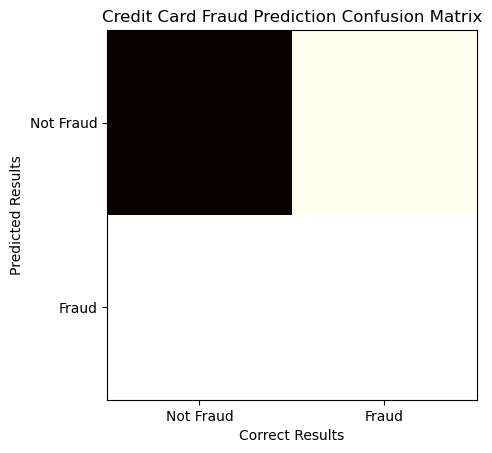

In [34]:
get_confusion_matrix(table=confusion_table, matrix_title="Credit Card Fraud Prediction Confusion Matrix")

In [35]:
def get_f1_components_barchart(table: list) -> None:
    barTable = {
    "True Negative":table[0][0],
    "False Negative":table[0][1],
    "False Positive":table[1][0],
    "True Positive":table[1][1]
    }
    plt.bar(range(len(barTable)), list(barTable.values()), align='center')
    plt.xticks(range(len(barTable)), list(barTable.keys()))
    # plt.yticks(np.arange(0, max(barTable.values()) + Y_STEP, Y_STEP))
    plt.title("Amount of Predicted Results when Compared against Validation Data")
    plt.show()

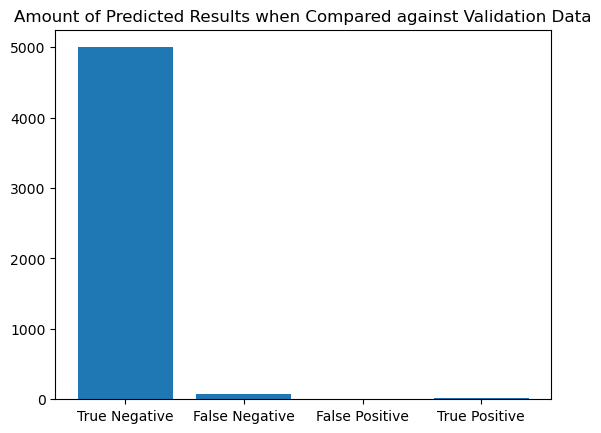

In [37]:
get_f1_components_barchart(table=confusion_table)

#### New model - test again with a more balanced dataset

In [40]:
balanced = pd.read_pickle('bal_validation_data.pkl')
balanced.shape

(9996, 47)

In [41]:
balanced.describe()

,current_age,retirement_age,birth_year,birth_month,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,expires_month,expires_year,has_chip,cards_issued,credit_limit,acct_open_month,acct_open_year,year_pin_last_changed,card_on_dark_web,card,year,month,day,amount,is_fraud,insufficient_balance,bad_pin,technical_glitch,bad_card_number,bad_cvv,bad_expiration,bad_zipcode,swipe_transaction,chip_transaction,online_transaction,gender_target_encoded,city_target_encoded,state_target_encoded,zipcode_target_encoded,card_brand_target_encoded,card_type_target_encoded,cvv_target_encoded,merchant_city_target_encoded,merchant_state_target_encoded,mcc_target_encoded,purchase_zip_target_encoded
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.0,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.0,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.0,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,53.480092,66.518207,1965.707483,6.457583,23595.079732,45897.810224,58160.232093,713.473389,3.806122,6.385954,2021.757003,0.904462,1.523709,14703.592637,6.400660,2008.402161,2011.866947,0.0,1.412865,2017.490696,6.331933,15.655762,70.467667,0.500000,0.0,0.010004,0.002501,0.001801,0.003001,0.001901,0.0,0.125150,0.622549,0.252301,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
std,16.156752,3.519739,16.154546,3.609018,11915.968184,23750.829926,53971.715896,64.519194,1.642673,3.439653,1.648707,0.293972,0.517950,11770.529613,3.445921,4.503518,3.040350,0.0,1.443244,1.238459,3.497110,8.846309,134.446732,0.500025,0.0,0.099523,0.049950,0.042399,0.054704,0.043558,0.0,0.330906,0.484773,0.434355,0.001003,0.271713,0.063530,0.309791,0.022293,0.040541,0.261556,0.439243,0.417333,0.304027,0.435381
min,18.000000,50.000000,1918.000000,1.000000,0.000000,1.000000,0.000000,488.000000,1.000000,1.000000,2016.000000,0.000000,1.000000,0.000000,1.000000,1991.000000,2002.000000,0.0,0.000000,2016.000000,1.000000,1.000000,-500.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.498930,0.000000,0.000000,0.000000,0.479888,0.467380,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,65.000000,1956.000000,3.000000,16985.000000,32581.250000,16946.000000,685.000000,3.000000,3.000000,2020.000000,1.000000,1.000000,7272.000000,3.000000,2005.000000,2010.000000,0.0,0.000000,2016.000000,3.000000,8.000000,9.880000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.498930,0.333333,0.471698,0.250000,0.479888,0.467380,0.333333,0.000000,0.065421,0.201389,0.000000
50%,51.000000,66.000000,1968.000000,7.000000,20902.000000,40470.000000,50734.000000,714.000000,4.000000,6.000000,2022.000000,1.000000,2.000000,12992.000000,6.000000,2009.000000,2011.000000,0.0,1.000000,2018.000000,6.000000,16.000000,37.955000,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.500939,0.500000,0.500000,0.555556,0.479888,0.467380,0.531250,0.752969,0.752969,0.418803,0.878095
75%,64.000000,69.000000,1978.000000,10.000000,26478.000000,52908.000000,84427.000000,755.000000,5.000000,9.000000,2023.000000,1.000000,2.000000,19959.000000,9.000000,2011.000000,2014.000000,0.0,2.000000,2019.000000,9.000000,23.000000,91.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.500939,0.717949,0.522989,0.750000,0.521078,0.538345,0.700000,0.999281,0.999640,0.846154,0.878095
max,101.000000,79.000000,2002.000000,12.000000,163145.000000,280199.000000,461854.000000,850.000000,9.000000,12.000000,2024.000000,1.000000,3.000000,141391.000000,12.000000,2020.000000,2020.000000,

In [42]:
# Process this balanced set (more equal share of fraud/non-fraud) same as the imbalanced set
balanced.drop(columns=['year'], inplace=True)
balanced.shape

(9996, 46)

In [49]:
balanced.columns

Index(['current_age', 'retirement_age', 'birth_year', 'birth_month',
       'per_capita_income_zipcode', 'yearly_income_person', 'total_debt',
       'fico_score', 'num_credit_cards', 'expires_month', 'expires_year',
       'has_chip', 'cards_issued', 'credit_limit', 'acct_open_month',
       'acct_open_year', 'year_pin_last_changed', 'card_on_dark_web', 'card',
       'month', 'day', 'amount', 'hour', 'minute', 'is_fraud',
       'insufficient_balance', 'bad_pin', 'technical_glitch',
       'bad_card_number', 'bad_cvv', 'bad_expiration', 'bad_zipcode',
       'swipe_transaction', 'chip_transaction', 'online_transaction',
       'gender_target_encoded', 'city_target_encoded', 'state_target_encoded',
       'zipcode_target_encoded', 'card_brand_target_encoded',
       'card_type_target_encoded', 'cvv_target_encoded',
       'merchant_city_target_encoded', 'merchant_state_target_encoded',
       'mcc_target_encoded', 'purchase_zip_target_encoded'],
      dtype='object')

In [45]:
x_bal = balanced.drop(columns=['is_fraud']).values.astype(np.float32)
y_bal = balanced['is_fraud'].values.astype(np.float32)
print(f"Balanced features: {x_bal.shape} & Balanced target: {y_bal.shape}")

Balanced features: (9996, 45) & Balanced target: (9996,)


In [46]:
bal_acc = model.evaluate(x_bal, y_bal)

313/313 [==============================] - 1s 4ms/step - loss: 636198.3125 - accuracy: 0.5000


In [47]:
bal_preds = model.predict(x_bal)
bal_confusion_table = get_confusion_table(bal_preds, y_bal)
bal_confusion_table

313/313 [==============================] - 1s 3ms/step


[[4998, 4998], [0, 0]]

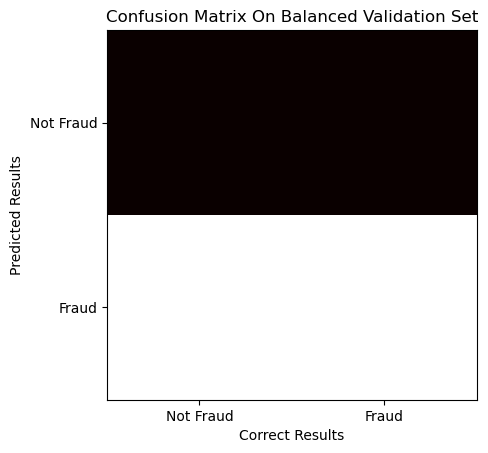

In [48]:
get_confusion_matrix(table=bal_confusion_table, matrix_title='Confusion Matrix On Balanced Validation Set')

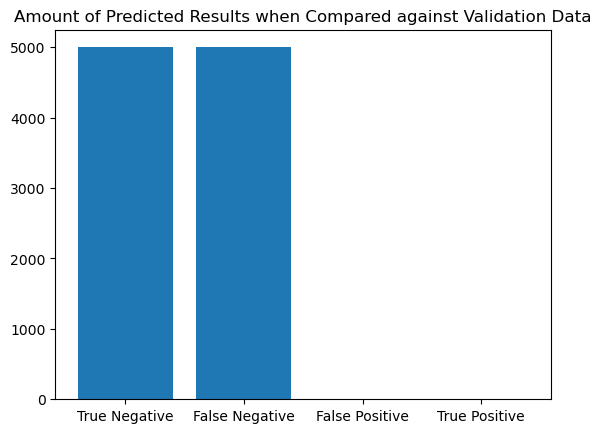

In [50]:
get_f1_components_barchart(table=bal_confusion_table)